In [7]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import numba as nb
from numba import njit as func_go_brrr
from random import random, seed
seed(123)

### Enkel funksjon for å gjøre dataklasser numba-vennlige

In [8]:
import numba as nb
from dataclasses import dataclass

def jitdataclass(cls=None, *, extra_spec=[]):
    """
    Helper decorator to make it easier to numba jitclass dataclasses

    Inspired by https://github.com/numba/numba/issues/4037#issuecomment-907523015
    """
    def _jitdataclass(cls):
        dc_cls = dataclass(cls, eq=False)
        del dc_cls.__dataclass_params__
        del dc_cls.__dataclass_fields__
        return nb.experimental.jitclass(dc_cls, spec=extra_spec)
    
    if cls is not None:
        # We've been called without additional args - invoke actual decorator immediately
        return _jitdataclass(cls)
    # We've been called with additional args - so return actual decorator which python calls for us
    return _jitdataclass

In [9]:
@jitdataclass
class Particle:
    x: nb.float32
    y: nb.float32
    vx: nb.float32
    vy: nb.float32
    # m: nb.float32
    # r: nb.float32
    
@dataclass
class test_Particle:
    x: float
    y: float
    vx: float
    vy: float
    # m: float
    # r: float

In [10]:
particles = [Particle(random(), random(), random(), random()) for _ in range(1_000_000)]

In [11]:
test_particles = [test_Particle(random(), random(), random(), random()) for _ in range(1_000_000)]

In [12]:
print(sys.getsizeof(particles[0]))
print(particles[0])
print(sys.getsizeof(test_particles[0]))
print(test_particles[0])
print()

48
48
test_Particle(x=0.41251398890477287, y=0.09314018191744389, vx=0.9241299065173832, vy=0.02468590526041259)



In [13]:
positions = np.array([[p.x, p.y] for p in particles])
print(sys.getsizeof(positions))

16000120


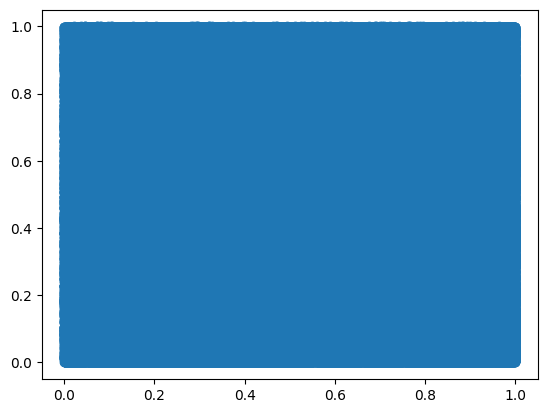

In [14]:
plt.scatter(positions[:, 0], positions[:, 1])
plt.show()

In [15]:
pos_matrix = np.random.rand(1_000_000, 2)
print(sys.getsizeof(pos_matrix))

16000120


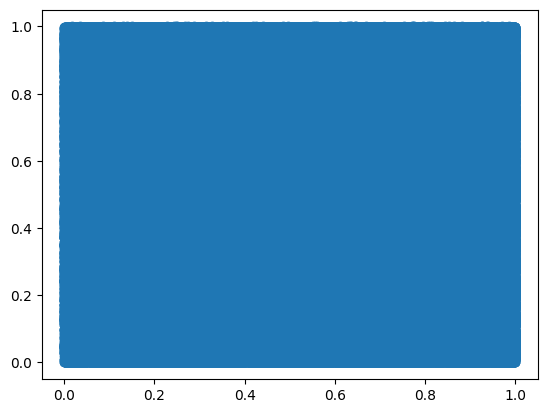

In [16]:
plt.scatter(pos_matrix[:, 0], pos_matrix[:, 1])

In [17]:
@func_go_brrr
def update_positions(particles, dt):
    for p in particles:
        p.x += p.vx * dt
        p.y += p.vy * dt
        
def test_update_positions(test_particles, dt):
    for p in test_particles:
        p.x += p.vx * dt
        p.y += p.vy * dt

In [21]:
update_positions(particles, 0.1)

In [20]:
test_update_positions(test_particles, 0.1)